EJERCICIO ESTADISTICAS CIGARROS

La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas,
producidas en su gran mayoría por enfermedades cardiovasculares.
El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes
de alto riesgo y reducir las complicaciones.

A partir de estos datos, buscaremos realizar algunas descripciones predictivos.
1. Cargaremos los datos y explóralmos, despues eliminanos los datos nulos o incorrectos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

df=pd.read_csv('cardio.csv')
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [ ]:
"""
Haremos una formula que reemplaza todos los NA por la mediana en la columna, debemos despues hacerlo en cada columna que no tenga los 4238 casos, la
idea es trabajar con una DF completa, sin datos faltantes.
"""
def rellenar_tablas(df,columna):
    mediana = df[columna].median()
    df[columna].fillna(mediana, inplace=True)
    return df

In [ ]:
#vamos a aplicar esta formula en cada columna con diferencias, que serian las siguientes:
df = rellenar_tablas(df,'education')
df = rellenar_tablas(df,'cigsPerDay')
df = rellenar_tablas(df,'BPMeds')
df = rellenar_tablas(df,'totChol')
df = rellenar_tablas(df,'BMI')
df = rellenar_tablas(df,'heartRate')
df = rellenar_tablas(df,'glucose')

In [ ]:
#Ahora revisaremos nuestro nuevo DF con los nulos reemplazados
df.info()

#Esta completo, podemos seguir avanzando entonces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


2. Escogeremos tres variables cuantitativas y realizaremos un análisis descriptivo de ellas, utilizando indicadores y gráﬁcos.


In [ ]:
"""
Haremos una formula que te reuna los indicadores solicitados extras, de esta manera se hace mas facil entender cada columna
"""
def datos_indicadores(df, columna):
    print("Estos son los datos indicadores de tu columna:")
    # Media
    mean = df[columna].mean()
    print(f"Media: {mean}")

    # Mediana
    median = df[columna].median()
    print(f"Mediana: {median}")

    # Moda
    mode = df[columna].mode()
    print(f"Moda: {mode.values}")

    # Desviación estándar
    std_dev = df[columna].std()
    print(f"Desviación estándar: {std_dev}")

    # Rango
    range_ = df[columna].max() - df[columna].min()
    print(f"Rango: {range_}")

    descripcion = df[columna].describe()
    print(f"Datos basicos: {descripcion}")

In [ ]:
#Vamos a comenzar con la variable de la columna de glucosa, estoy seguro que habra algo por ahi que comentar. por aqui debe haber una mayor dispersion.

datos_indicadores(df, 'glucose')

Estos son los datos indicadores de tu columna:
Media: 81.60358659745162
Mediana: 78.0
Moda: [78.]
Desviación estándar: 22.86524554289783
Rango: 354.0
Datos basicos: count    4238.000000
mean       81.603587
std        22.865246
min        40.000000
25%        72.000000
50%        78.000000
75%        85.000000
max       394.000000
Name: glucose, dtype: float64


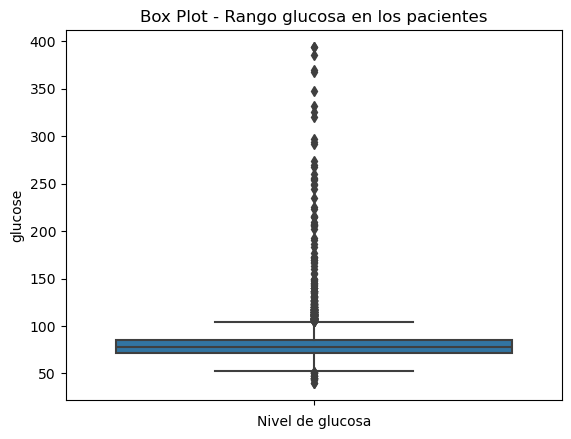

In [ ]:
# Crear el boxplot para comparar las edades del grafico
sns.boxplot(y='glucose', data=df)

# Personalización opcional
plt.title('Box Plot - Rango glucosa en los pacientes')
plt.xlabel('Nivel de glucosa')

# Mostrar el boxplot
plt.show()

In [ ]:
"""
Interesante, por aqui se logra notar que existe una tendencia por sobre la media, tenemos bastantes casos atipicos que hablan de un alto nivel de
glucosa en estas personas, por ahora nuestro grafico señala que lo normal son 81 aprox. Pero tenemos bastantes variables mas que pueden incidir,
en los proximos ejercicios los compararemos con otras columnas, o buscaremos las correlaciones para notar la coincidencia entre ellas.
"""

In [ ]:
datos_indicadores(df,'heartRate')

Estos son los datos indicadores de tu columna:
Media: 75.87871637564889
Mediana: 75.0
Moda: [75.]
Desviación estándar: 12.025184612123443
Rango: 99.0
Datos basicos: count    4238.000000
mean       75.878716
std        12.025185
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64


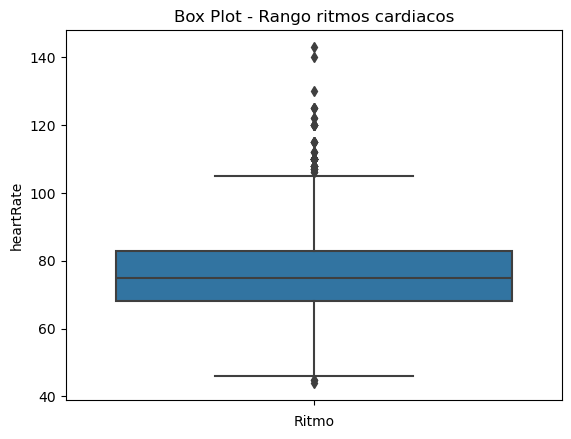

In [ ]:
# Crear el boxplot para comparar las edades del grafico
sns.boxplot(y='heartRate', data=df)

# Personalización opcional
plt.title('Box Plot - Rango ritmos cardiacos')
plt.xlabel('Ritmo')

# Mostrar el boxplot
plt.show()

In [ ]:
"""
Acá tenemos un dato alarmante, pero no es complicado de solucionar, los casos atipicos señalan que hay personas que tienen el DOBLE de casos de ritmo
cardiaco por sobre la media (75), de taquicardia (alto indice de latidos) y de bradicardia (bajo indice de latidos), estos casos dan indicios a situaciones
anómalas, pero, para evitar confusiones, se eliminarán estos casos atipicos.
"""

In [ ]:
datos_indicadores(df,'cigsPerDay')

Estos son los datos indicadores de tu columna:
Media: 8.941481831052384
Mediana: 0.0
Moda: [0.]
Desviación estándar: 11.902398767103985
Rango: 70.0
Datos basicos: count    4238.000000
mean        8.941482
std        11.902399
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64


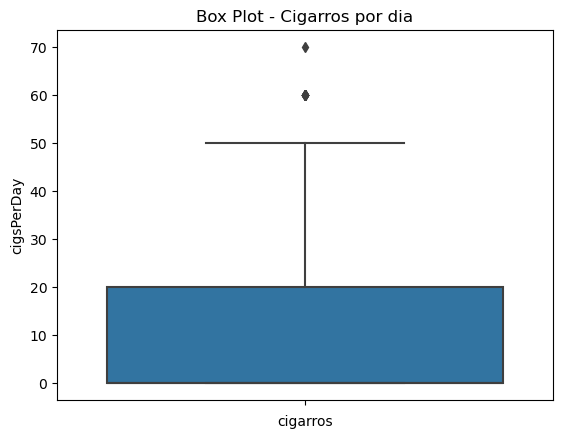

In [ ]:
#cigsPerDay
# Crear el boxplot para comparar las edades del grafico
sns.boxplot(y='cigsPerDay', data=df)

# Personalización opcional
plt.title('Box Plot - Cigarros por dia')
plt.xlabel('cigarros')

# Mostrar el boxplot
plt.show()

In [ ]:
"""
Aca podemos notar una media de 8 cigarros por persona, en promedio es una cajetilla, lo que es alarmante es la creciente cantidad de personas que fuman
hasta 2 cajetillas, ya que el grafico de bigote señala posibles maximos de situaciones. Además, tambien los casos que estan afuera del grafico de bigote, representan casos severos de
addiccion. Esto puede ser imposible, o un error de tipeo, u otros, pero, para evitar daños en el grafico y analisis de nuestra DF, vamos a posteriormente eliminarlos.
"""

3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"


In [ ]:
##vamos a limpiar todo el DF, pero para no tener complicaciones con los datos, es recomendable ir columna por columna, de la misma manera que lo
#hicimos con el relleno de los NA en las columnas. #Lo bueno es que esto se entrega en una copia, asi que no se verá afectado el DF original.
def eliminar_outliers(df, columna):
    # Calcular los cuartiles
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos para eliminar los outliers
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df_filtrado

In [ ]:
"""
Seran 7 las columnas que se verán afectadas por esta filtracion, de preferencia son aquellas que tienen numeros cuantitativos discretos, no aquellas
que estan en codigo o que son binarias o que tienen un booleano, vale decir, las "int64" quedan fuera.
"""

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [ ]:
# Aplicar la eliminación de outliers secuencialmente
df_filtrado = df.copy()  # Copia del DataFrame original

columnas = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for columna in columnas:
    df_filtrado = eliminar_outliers(df_filtrado, columna)

print(f"\nNúmero de filas originales: {len(df)}")
print(f"Número de filas después de eliminar outliers: {len(df_filtrado)}")


Número de filas originales: 4238
Número de filas después de eliminar outliers: 3630


In [ ]:
"""
Ahí estamos con lo solicitado, este nuevo df, df_filtrado, será el que utilizaremos para los proximos ejercicios solicitados, como por ejemplo,
el de correlacion.
"""

4. ¿Qué variables cuantitativas presentan mayor correlación?


In [ ]:
##para hacer una correlacion, debemos primero convertir en numeros todas las columnas, son importantes para las proximas preguntas
#asi que transformaremos en INT las columnas que estan en STRINGS, que en este caso serian, "SEX" y "CurrentSmoker"

replace_corr = {'M':1, 'F':0, 'No':0, 'Yes':1}

df_filtrado['sex'] = df_filtrado['sex'].replace(replace_corr)

In [ ]:
df_filtrado['currentSmoker'] = df_filtrado['currentSmoker'].replace(replace_corr)

In [ ]:
correlation_matrix = df_filtrado.corr()

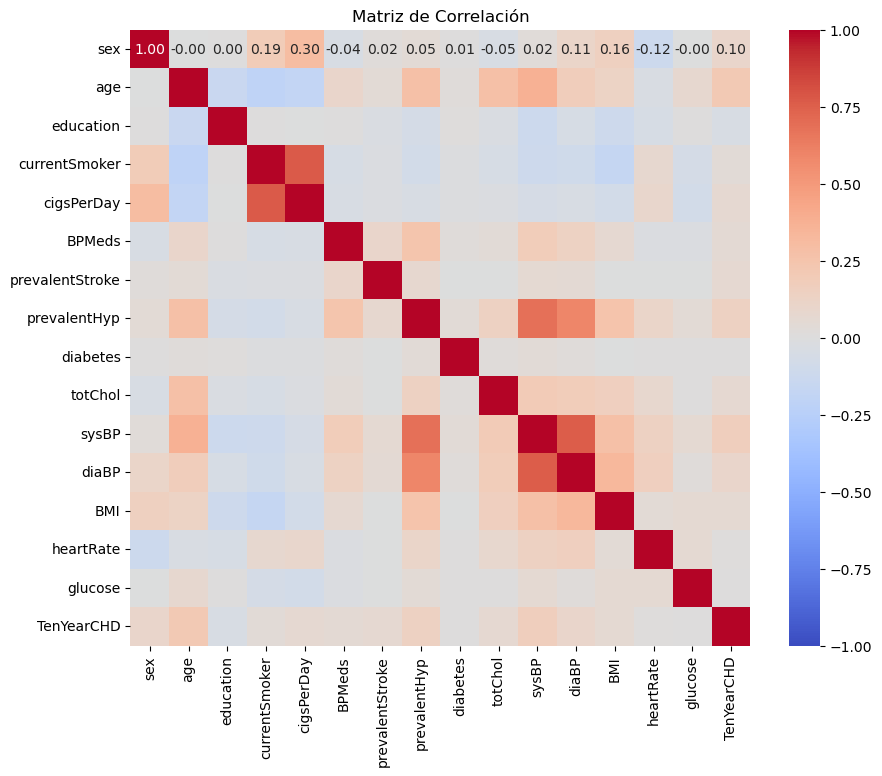

In [ ]:
##Crearemos una tabla de correlacion para que nos de una mejor idea de lo solicitado
# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
"""
Los valores señalados en la matriz de correlacion no denotan tanta relacion en el grafico, por lo que se puede notar, es bien parejo
el resultado otorgado. Hay relaciones directas, sin embargo son su opuesto, hay relaciones inversas, que no tienen ninguna relacion en algunos casos,
creo que, para un mejor analisis, seria mejor señalar resultados haciendo comparaciones que involucren 2 o mas variables para tener un mejor entendimiento de las variables y obtener mejores conclusiones.
"""

5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre,
si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?


In [ ]:
"""
Para esto necesitamos ir por pasos para llegar al conteo del resultado final, ire señalandolo por partes.
BODY MASS INDEX (indice de masa corporal en ingles)
"""
# Primero, a calcular el cuartil superior del IMC
cuartil_superior = df_filtrado['BMI'].quantile(0.75)

# Luego, vamos a filtrar pacientes en el mayor cuartil del IMC
pacientes_mayor_cuartil = df_filtrado[df_filtrado['BMI'] >= cuartil_superior]

# Necesitamos el total de pacientes en el mayor cuartil
total_mayor_cuartil = len(pacientes_mayor_cuartil)

# ahora hay que contar el número de hombres en el mayor cuartil
hombres_mayor_cuartil = pacientes_mayor_cuartil[pacientes_mayor_cuartil['sex'] == 1]
num_hombres_mayor_cuartil = len(hombres_mayor_cuartil)

# Por ultimo, vamos a calcular la probabilidad
probabilidad = num_hombres_mayor_cuartil / total_mayor_cuartil * 100

print(f"La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil del IMC, es del {probabilidad}%")

La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil del IMC, es del 52.8052805280528%


In [ ]:
"""
Considerando todas las condiciones señaladas y utilizando el DF limpio, la probabilidad de toparnos con la situacion señalada es de un 52%
"""

6. ¿Es razonable aﬁrmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justiﬁca.


In [ ]:
##Puede ser, depende de la cantidad de datos que tenga nuestro DF, por ejemplo, en el caso no dentro del dataset, con google de referencia serian 60 a 100
##pulsaciones por minuto, lo que nos da un promedio de 80 aproximadamente, se podria decir que si considerando que la poblacion mundial es como referencia.
##Ahora bien, en nuestro DF (el que esta limpio) los resultados son distintos:

df_filtrado['heartRate'].mean()

74.64269972451791

In [ ]:
df_filtrado['heartRate'].std()

#Aqui se logra notar que se acerca a la aseveracion señalada, pero anteriormente notamos diferencias considerables que podrian modificar el resultado final
#ya que los valores atipicos tienden a generar variaciones significativas en el resultado.

10.809984637091235

In [ ]:
"""
Esto quiere decir, que si nuestro promedio es 74, con su desviacion puede ser 84 y 64 para estar dentro de un promedio estable.
"""

7. Ahora con graficos hechos y limpios, podemos hacer las siguientes aseveraciones:
 - Ser hombre, ¿inﬂuye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores?


In [ ]:
###Para obtener los resultados señalados en esta pregunta se debe hacer de la siguiente manera:
# Filtrar solo a los pacientes fumadores
fumadores = df_filtrado[df_filtrado['currentSmoker'] == 1]

# Separar los datos por género
hombres = fumadores[fumadores['sex'] == 1]['cigsPerDay']
mujeres = fumadores[fumadores['sex'] == 0]['cigsPerDay']

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(hombres, mujeres)

print(f"Estadístico t: {t_stat:.2f}")
print(f"P-valor: {p_value:.4f}")

# Evaluar el p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.")


Estadístico t: 15.74
P-valor: 0.0000
Rechazamos la hipótesis nula: Hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre hombres y mujeres.


In [ ]:
"""
Los casos de esta situacion dan una respuesta considerable, no solo ser hombre es una respuesta contundente para poder decir que fuman mas,
tenemos mas variables que utilizar en comparacion para dar una respuesta, por ejemplo, quizas el nivel de estudio o la edad son variables que hacen la
diferencia mas allá del sexo del paciente.
"""

8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal.
(Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.


In [ ]:
# Paso 1: Definir variables predictoras (X) y variable de respuesta (y)
X = df_filtrado[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y = df_filtrado['BMI']

In [ ]:
# Codificar las variables cualitativas 'prevalentHyp' y 'diabetes'
X_encoded = pd.get_dummies(X, columns=['prevalentHyp', 'diabetes'], drop_first=True)

In [ ]:
# Agregar una constante (intercepto) a las variables predictoras
X_encoded = sm.add_constant(X_encoded)

In [ ]:
# Convertir variables a tipo numérico
X = X.astype(float)
y = y.astype(float)

In [ ]:
# Codificar las variables cualitativas 'diabetes' y 'sex'
X_encoded = pd.get_dummies(X, columns=['diabetes', 'prevalentHyp'], drop_first=True)

# Verificar los tipos de datos después de la codificación
print(X_encoded.dtypes)

heartRate           float64
totChol             float64
glucose             float64
sysBP               float64
diabetes_1.0           bool
prevalentHyp_1.0       bool
dtype: object


In [ ]:
# Convertir variables booleanas a enteros
X_encoded = X_encoded.astype(int)

In [ ]:
# Convertir variable dependiente a tipo numérico
y = y.astype(float)

In [ ]:
# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()

# Obtener resultados del modelo
results = model.summary()
print(results)

# Realizar predicciones
predictions = model.predict(X_encoded)

# Calcular el Error Cuadrático Medio (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)

# Obtener el valor R² del modelo
from sklearn.metrics import r2_score
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                                 OLS Regression Results                                
Dep. Variable:                    BMI   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          3.133e+04
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                        0.00
Time:                        09:48:03   Log-Likelihood:                         -9721.9
No. Observations:                3630   AIC:                                  1.946e+04
Df Residuals:                    3624   BIC:                                  1.949e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
"""
PESE A QUE LOS RESULTADOS SON NEGATIVOS DEJAREMOS LOS RESULTADOS; un R2 negativo implica que los valores a los cuales
se está haciendo comparacion no son concluyentes, pero los dejare ahí de todas formas, ya que cuenta como parte de un analisis.

Una situacion interesante que ocurrió y por lo mismo en el paso a paso voy a explicarlo lentamente, es que tengo columnas que estan en la variable BOOLEANA
ya que a eso se transforman en su primera parte, la solucion para obtener resultados claros fue transformarles en variables numericas
porque el modelo de regresion solicita numeros (float o INT) para poder trabajar, y el booleano funciona como texto, aunque sean 0 y 1.

Es importante recalcar que la negatividad del r2 no esta relacionada a todo el trabajo, sino que la relacion entre diabetes y IMC, de acuerdo al modelo
NO TIENEN RELACION ALGUNA, pero los demas valores si tienen inferencia en los resultados.
"""

9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años,
a partir de las variables descritas. Veriﬁca el balanceo de datos y evalúa tu modelo.


In [ ]:
X = df_filtrado[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y = df_filtrado['TenYearCHD']

# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo a los datos
model.fit(X, y)

# Realiza predicciones con el modelo
y_pred = model.predict(X)

# Calcula la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Genera un informe de clasificación que incluye precisión, recuperación y F1-score
report = classification_report(y, y_pred)
print('Informe de Clasificación:')
print(report)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, y_pred, average='weighted', zero_division=0)
recall = recall_score(y, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y, y_pred, average='weighted', zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precisión del modelo: 0.8672176308539945
Matriz de Confusión:
[[3148    0]
 [ 482    0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3148
           1       0.00      0.00      0.00       482

    accuracy                           0.87      3630
   macro avg       0.43      0.50      0.46      3630
weighted avg       0.75      0.87      0.81      3630

Precision: 0.75
Recall: 0.87
F1 Score: 0.81


C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

AUC-ROC: 0.6478670512002616
AUC-PR: 0.21348282235132376


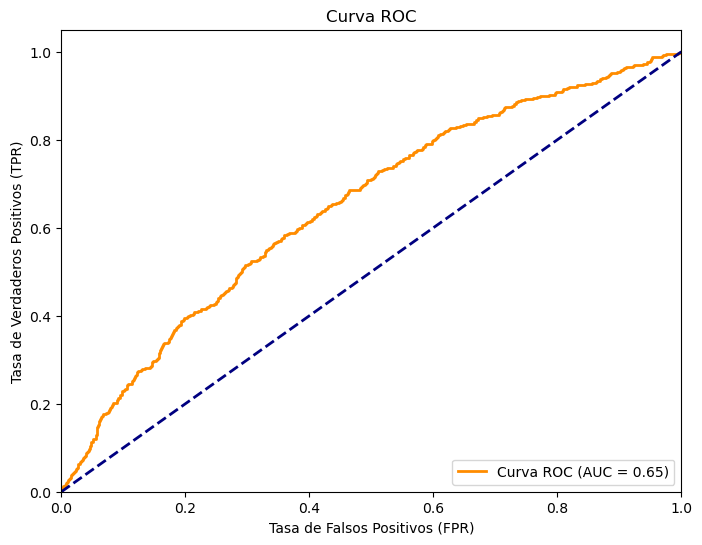

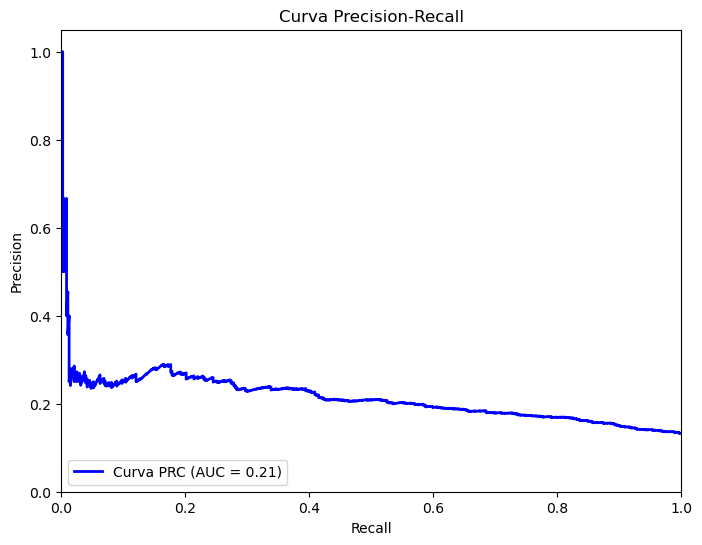

In [ ]:
# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X)[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y, y_prob)
print(f'AUC-ROC: {roc_auc}')

# Calcular el AUC-PR
prc_auc = average_precision_score(y, y_prob)
print(f'AUC-PR: {prc_auc}')

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y, y_prob)

# Calcular la curva PRC
precision, recall, thresholds_prc = precision_recall_curve(y, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Graficar la curva PRC
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PRC (AUC = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Mostrar las curvas ROC y PRC
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Variables predictoras y variable dependiente
X = df_filtrado[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']].values
y = df_filtrado['TenYearCHD'].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo de Regresión Logística sin SMOTE
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_scaled, y)

# Realizar predicciones en el conjunto de datos sin SMOTE
y_pred = logistic_regression_model.predict_proba(X_scaled)[:, 1]

# Calcular AUC-ROC sin SMOTE
roc_auc = roc_auc_score(y, y_pred)

# Calcular AUC-PR sin SMOTE
average_precision = average_precision_score(y, y_pred)

# Aplicar SMOTE y crear el modelo nuevamente
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict_proba(X_scaled)[:, 1]

# Calcular AUC-ROC con SMOTE
roc_auc_smote = roc_auc_score(y, y_pred_smote)

# Calcular AUC-PR con SMOTE
average_precision_smote = average_precision_score(y, y_pred_smote)

# Imprimir AUC-ROC y AUC-PR para ambos modelos
print("AUC-ROC sin SMOTE:", roc_auc)
print("AUC-PR sin SMOTE:", average_precision)
print("AUC-ROC con SMOTE:", roc_auc_smote)
print("AUC-PR con SMOTE:", average_precision_smote)

AUC-ROC sin SMOTE: 0.6478123500661686
AUC-PR sin SMOTE: 0.21354747718361095
AUC-ROC con SMOTE: 0.64728511021949
AUC-PR con SMOTE: 0.21321612461519254


In [ ]:
"""
ya, ahora que tenemos resultados de estas variables podemos concluir los siguiente: el modelo esta mal implementado pero no en su funcionamiento,
sino que en la eleccion de las variables logisticas, ya que no generan una relacion que permita otorgar resultados altamente concluyentes, hablando
con numeros especificos, un modelo sin SMOTE con un AUC-ROC de 0,64 señala que es capaz de dicernir de un resultado binomial pero no es excelente, ya que
para esto debe acercarce al 1 y no al 0.50. Ahora bien, si ahora tiene SMOTE no hay mayor diferencia, es mas, SE MANTIENE, lo que quiere decir que el
SMOTE no hace la diferencia y otro metodo de balance es necesario. El AUC-PR da un 0,2 de acuerdo a los datos señalados en el analisis, esto significa
que al sistema le cuesta dicernir entre los positivos de clase.
En conclusion, las variables señaladas para hacer la regresion no tienen mucha validez, ya que no estan tan relacionadas en comparacion a variables que
si pueden hacer la diferencia.
"""

10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

In [ ]:
##Aqui me demore harto tratando de hacer funcionar el diagrama y esto se debe a que tenia la columna de 'sex' en STR, por lo tanto
#me dificultaba seguir avanzando, entonces preferi ir paso a paso

In [ ]:
# Supongamos que df_filtrado es tu DataFrame original
df_filtrado['sex'] = pd.to_numeric(df_filtrado['sex'], errors='coerce')
df_male = df_filtrado[df_filtrado['sex'] == 1]
df_female = df_filtrado[df_filtrado['sex'] == 0]

In [ ]:
# Definir variables predictoras y de respuesta para hombres
X_male = df_male[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y_male = df_male['BMI']

# Definir variables predictoras y de respuesta para mujeres
X_female = df_female[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y_female = df_female['BMI']

In [ ]:
# Codificar variables categóricas para hombres
X_male_encoded = pd.get_dummies(X_male, columns=['diabetes', 'prevalentHyp'])
X_male_encoded = X_male_encoded.astype(int)
X_male_encoded = sm.add_constant(X_male_encoded)

In [ ]:
# Ajustar el modelo
model_male = sm.OLS(y_male, X_male_encoded).fit()

# Mostrar resultados
print("Modelo para Hombres:")
print(model_male.summary())

Modelo para Hombres:
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     22.35
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.21e-25
Time:                        10:35:45   Log-Likelihood:                -4041.8
No. Observations:                1594   AIC:                             8098.
Df Residuals:                    1587   BIC:                             8135.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.18

In [ ]:
# Codificar variables categóricas para mujeres
X_female_encoded = pd.get_dummies(X_female, columns=['diabetes', 'prevalentHyp'])
X_female_encoded = X_female_encoded.astype(int)
X_female_encoded = sm.add_constant(X_female_encoded)

# Ajustar el modelo
model_female = sm.OLS(y_female, X_female_encoded).fit()

# Mostrar resultados
print("Modelo para Mujeres:")
print(model_female.summary())


Modelo para Mujeres:
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     42.52
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           4.25e-49
Time:                        10:37:23   Log-Likelihood:                -5369.4
No. Observations:                2036   AIC:                         1.075e+04
Df Residuals:                    2029   BIC:                         1.079e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.34

In [ ]:
"""
Como se logra ver en el apartado de IMC (BMI en ingles) se notan diferencias sustanciales a raiz del sexo, esto nos permite acceder a diferentes valores
y obtener distintas conclusiones basadas en el sexo de la persona.
Tengo una variable extra de diabetes y de prevalent HYP, a esta altura ya me asusta modificar tanto el resultado, asi que prefiero dejarlos como variables
aleatorias por el comando que otorga el "Dummies"
"""

Comparacion de la regresion logistica

In [ ]:
# Primero, a filtrar por sexo
df_filtrado['sex'] = pd.to_numeric(df_filtrado['sex'], errors='coerce')
df_male = df_filtrado[df_filtrado['sex'] == 1]
df_female = df_filtrado[df_filtrado['sex'] == 0]

In [ ]:
# Variables para hombres
X_male = df_male[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y_male = df_male['TenYearCHD']

# Variables para mujeres
X_female = df_female[['heartRate', 'totChol', 'glucose', 'sysBP', 'diabetes', 'prevalentHyp']]
y_female = df_female['TenYearCHD']

In [ ]:
# Codificar variables categóricas para hombres
X_male_encoded = pd.get_dummies(X_male, columns=['diabetes', 'prevalentHyp'])
X_male_encoded = X_male_encoded.astype(int)

# Codificar variables categóricas para mujeres
X_female_encoded = pd.get_dummies(X_female, columns=['diabetes', 'prevalentHyp'])
X_female_encoded = X_female_encoded.astype(int)

In [ ]:
# Modelo para hombres
# Añadir constante (intercepto)
X_male_encoded = sm.add_constant(X_male_encoded)

# Ajustar el modelo
model_male = sm.Logit(y_male, X_male_encoded).fit()

# Mostrar resumen del modelo
print("Resumen del modelo para hombres:")
print(model_male.summary())


Optimization terminated successfully.
         Current function value: 0.433986
         Iterations 20
Resumen del modelo para hombres:
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1594
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                 0.05220
Time:                        11:41:23   Log-Likelihood:                -691.77
converged:                       True   LL-Null:                       -729.88
Covariance Type:            nonrobust   LLR p-value:                 2.168e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.8305        nan        nan        nan        

In [ ]:
#Modelo para mujeres
# Añadir constante (intercepto)
X_female_encoded = sm.add_constant(X_female_encoded)

# Ajustar el modelo
model_female = sm.Logit(y_female, X_female_encoded).fit()

# Mostrar resumen del modelo
print("Resumen del modelo para mujeres:")
print(model_female.summary())


Optimization terminated successfully.
         Current function value: 0.319457
         Iterations 8
Resumen del modelo para mujeres:
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2036
Model:                          Logit   Df Residuals:                     2029
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                 0.03450
Time:                        11:41:34   Log-Likelihood:                -650.41
converged:                       True   LL-Null:                       -673.65
Covariance Type:            nonrobust   LLR p-value:                 2.373e-08
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5369   1.31e+07  -1.17e-07      1.000   -2.57e

In [ ]:
# Estandarizar variables
scaler = StandardScaler()
X_male_scaled = scaler.fit_transform(X_male_encoded)
X_female_scaled = scaler.fit_transform(X_female_encoded)

# Ajustar el modelo para hombres
model_male_sklearn = LogisticRegression()
model_male_sklearn.fit(X_male_scaled, y_male)

# Ajustar el modelo para mujeres
model_female_sklearn = LogisticRegression()
model_female_sklearn.fit(X_female_scaled, y_female)

# Mostrar coeficientes y métricas
print("Coeficientes del modelo para hombres (sklearn):")
print(model_male_sklearn.coef_)
print("\nCoeficientes del modelo para mujeres (sklearn):")
print(model_female_sklearn.coef_)


Coeficientes del modelo para hombres (sklearn):
[[ 0.          0.01749608  0.14973202  0.01308988  0.56012177  0.03492233
  -0.03492233  0.0248688  -0.0248688 ]]

Coeficientes del modelo para mujeres (sklearn):
[[ 0.         -0.06214166  0.14415662 -0.03775481  0.17256028 -0.01920046
   0.01920046 -0.13280056  0.13280056]]


In [ ]:
"""
Para finalizar, una separacion de sexos por cada tipo de analisis es significativo, los resultados (si bien negativos, no necesariamente implica que estan
mal) son un claro ejemplo de que tanto los hombres como las mujeres se ven afectadas de manera diferente cuando consideramos el estimado de 10 años
para enfermedades asociadas al corazon.
"""